<a href="https://colab.research.google.com/github/Sid-9823/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <u>**Project Title : Bike Sharing Demand Prediction**</u>
#####**Project Type** - Regression

#####**Contribution** - Individual

#####**Individual name** - Siddhant Pal

#####**Cohort** - Berlin

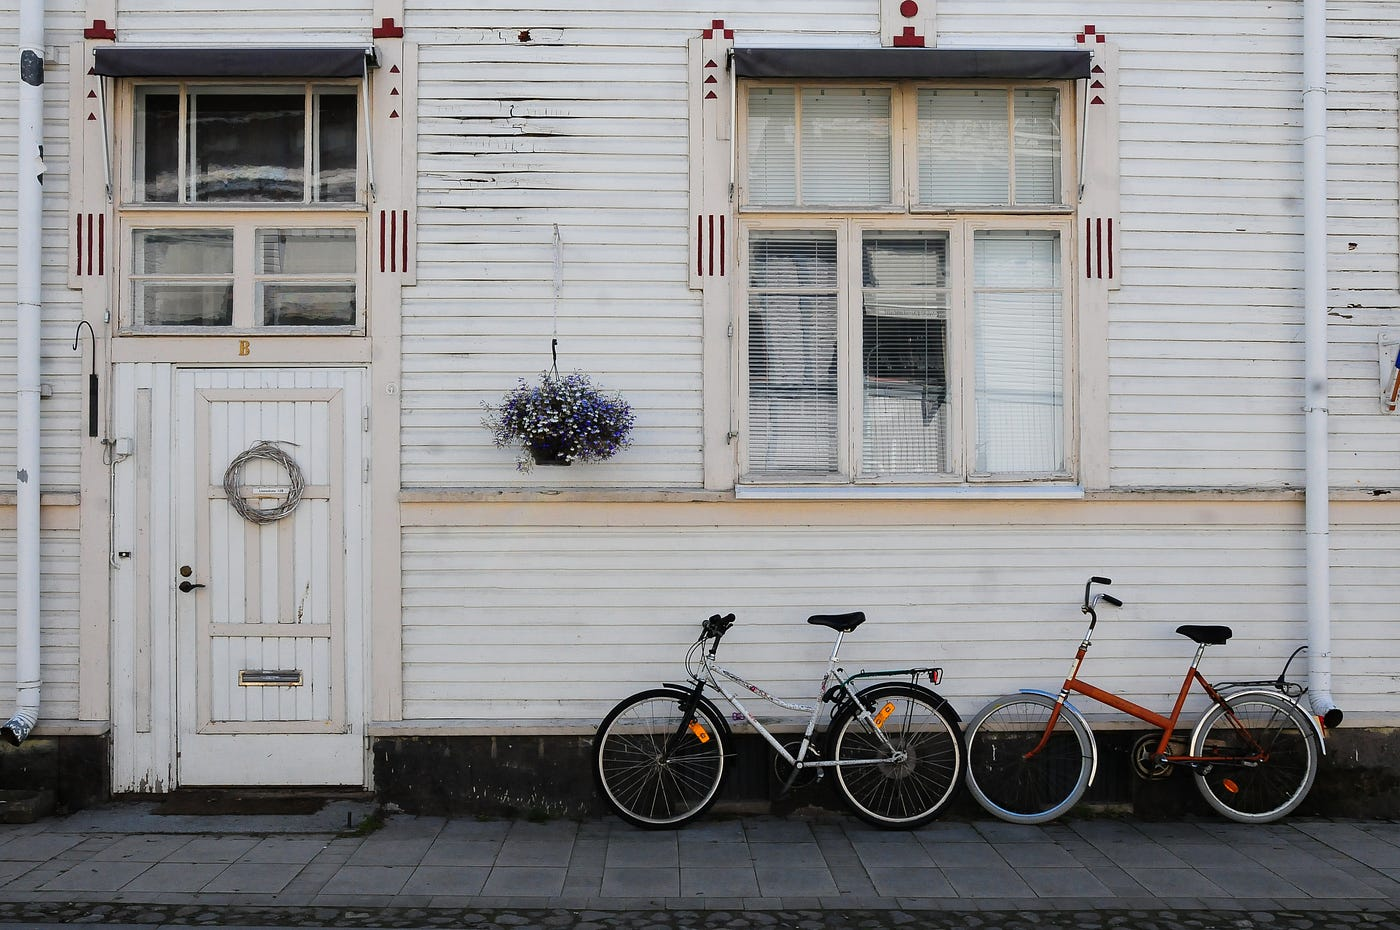

#**GitHub Link**

https://github.com/Sid-9823/Bike-Sharing-Demand-Prediction.git

#**Problem statement**

**BUSINESS PROBLEM OVERVIEW**

Rental bikes have become an increasingly popular mode of transportation in urban areas, as they provide a convenient and eco-friendly alternative to traditional means of getting around. However, one of the key challenges in implementing rental bike schemes is ensuring a stable supply of bikes at all times. In order to address this issue, it is crucial to accurately predict the number of bikes required at different hours of the day.

In this project, I am using various machine learning regression models to analyze various factors that impact bike usage, such as temperature, season, rainfall, holidays, the number of rented bikes at different times of the day, etc. By taking these factors into account, it becomes possible to forecast demand and allocate resources accordingly, ensuring a steady supply of rental bikes and reducing wait times for users.

### **Data Description** 

**The dataset contains weather information such as (Temperature, Windspeed, Humidity, Visibility, Dew point, Solar Radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

**Feature's Information :**
* ***Date*** : *The date of the day during 365 days from 1/12/2017 to 30/11/2018 formatting in DD/MM/YYYY, type : str, we need to convert it into datetime format.*

* ***Rented Bike Count*** : *Count of bikes rented at each hour and it is our target variable, type : int*
* ***Hour*** : *The hour of the day starting from 0-23, type : int, we need to convert it into category data types.*
* ***Temperature*** : *Temperature in Celsius, type : Float.*
* ***Humidity*** : *Humidity in the air in %, type : int*
* ***Windspeed*** : *Speed of the wind in m/s, type : Float*
* ***Visibility(10m)*** : *Visibility in m, type : int*
* ***Dew point temperature*** : *Temperature at the beginning of the day in celsius, type : int*
* ***Solar Radiation(MJ/m2)*** : *Sun contribution, type : Float*
* ***Rainfall(mm)*** : *Amount of raining in mm, type : float*
* ***Snowfall(cm)*** : *Amount of snowing in cm, type : float*
* ***Seasons*** : *Season of the year, type : str (Four types of season's present in data)*
* ***Holiday*** : *If the day is Holiday or not, type : str*
* ***Functional Day*** : *If the day is a Functioning Day or not, type : str*






#**Importing necessary libraries**

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from datetime import datetime as dt

!pip install shap
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.2 MB/s eta 0:00:00


# **Data collection and analysis** 

In [2]:
# Loading the data from csv file to a pandas dataframe.

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv')

In [3]:
# Printing first 5 rows.

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
 # Printing last 5 rows.

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
# Checking the number of rows and columns in our dataset.

df.shape

(8760, 14)

In [6]:
# Gathering information about our dataset such as null count values and data types involved.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
#  Getting the statistical measure of the dataframe.

df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


##**Data wrangling**

### **Changing column's names**

* ***Changing column's names as per our convenience as they are large and consist units in them in dataset.***

In [8]:
df = df.rename(columns={'Date':'date','Rented Bike Count':'rbc','Hour':'hour','Temperature(°C)':'temp','Humidity(%)':'hum',
                        'Wind speed (m/s)':'wind','Visibility (10m)':'visib','Dew point temperature(°C)':'dpt',
                        'Solar Radiation (MJ/m2)':'rad','Rainfall(mm)':'rain','Snowfall (cm)':'snow'})

* ***Splitting and converting 'Date' column from the dataframe into three other column's and changing it's data type in the next step.***

### **Breaking Date column**

In [9]:
# Converting 'date' column from object dtype to datetime object for further analysis.

d = pd.to_datetime(df['date'])

In [10]:
# Further breaking 'date' column into 'month' and 'day' column.

df['month'] = d.dt.month
df['day'] = d.dt.day_name()

In [11]:
# Creating a new column 'weekend' and dropping unnecessary columns.

df['weekend'] = df['day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
df.drop(columns = ['date','day'],axis = 1,inplace = True)

* ***Here, we broke 'date' column into various other column's for better understanding of data and created a new column 'weekend' to dive into insights of bike rentals at weekend.***

* ***And in the last, we dropped 'day' and 'date' columns as the required data can be accessed through 'month' and 'weeknd' column.***

In [12]:
df.head()

,rbc,hour,temp,hum,wind,visib,dpt,rad,rain,snow,Seasons,Holiday,Functioning Day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rbc              8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temp             8760 non-null   float64
 3   hum              8760 non-null   int64  
 4   wind             8760 non-null   float64
 5   visib            8760 non-null   int64  
 6   dpt              8760 non-null   float64
 7   rad              8760 non-null   float64
 8   rain             8760 non-null   float64
 9   snow             8760 non-null   float64
 10  Seasons          8760 non-null   object 
 11  Holiday          8760 non-null   object 
 12  Functioning Day  8760 non-null   object 
 13  month            8760 non-null   int64  
 14  weekend          8760 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 1.0+ MB


In [14]:
# Checking the value counts of weekend's.

df['weekend'].value_counts()

0    6216
1    2544
Name: weekend, dtype: int64

### **Converting data type**

* ***We are converting data types of 'month', 'weekend' and 'Hour' column from 'integer' to 'category' data type, as it'll help us to derive more accurate observation's and it'll also help us to avoid un-necessary possible correlations between these column's.***

In [15]:
df.nunique()

rbc                2166
hour                 24
temp                546
hum                  90
wind                 65
visib              1789
dpt                 556
rad                 345
rain                 61
snow                 51
Seasons               4
Holiday               2
Functioning Day       2
month                12
weekend               2
dtype: int64

In [16]:
# Changing the datatype from integer to category.

column = ['hour','month','weekend']

for a in column:
 df[a] = df[a].astype('category')

In [17]:
# As, we can see dtypes have changed to category.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   rbc              8760 non-null   int64   
 1   hour             8760 non-null   category
 2   temp             8760 non-null   float64 
 3   hum              8760 non-null   int64   
 4   wind             8760 non-null   float64 
 5   visib            8760 non-null   int64   
 6   dpt              8760 non-null   float64 
 7   rad              8760 non-null   float64 
 8   rain             8760 non-null   float64 
 9   snow             8760 non-null   float64 
 10  Seasons          8760 non-null   object  
 11  Holiday          8760 non-null   object  
 12  Functioning Day  8760 non-null   object  
 13  month            8760 non-null   category
 14  weekend          8760 non-null   category
dtypes: category(3), float64(6), int64(3), object(3)
memory usage: 848.3+ KB


# **Exploratory Data Analysis and Visualization**

**What is EDA ?**

***Exploratory Data Analysis can be considered as a process which is used to visualise data and it helps to uncover the underlying pattern and relations between the dependent and independent variable's which can be useful in decision making.***

## **Bivariate Analysis**

***A bivariate analysis is a type in which two variable's are taken into consideration and underlying relationship between the two is analysed.***

### **Analysis of Dependent variable vs. Categorical data type**

***Here, we are trying to find the underlying relationship's between dependent(Output) and independent variable's one by one. First, we will proceed with relationship's of dependent variable(Output) with categorical and object data type's then afterwards with numerical or integer data type's.***

####**Month**

Text(0.5, 1.0, 'Rented bike count per month over a year')

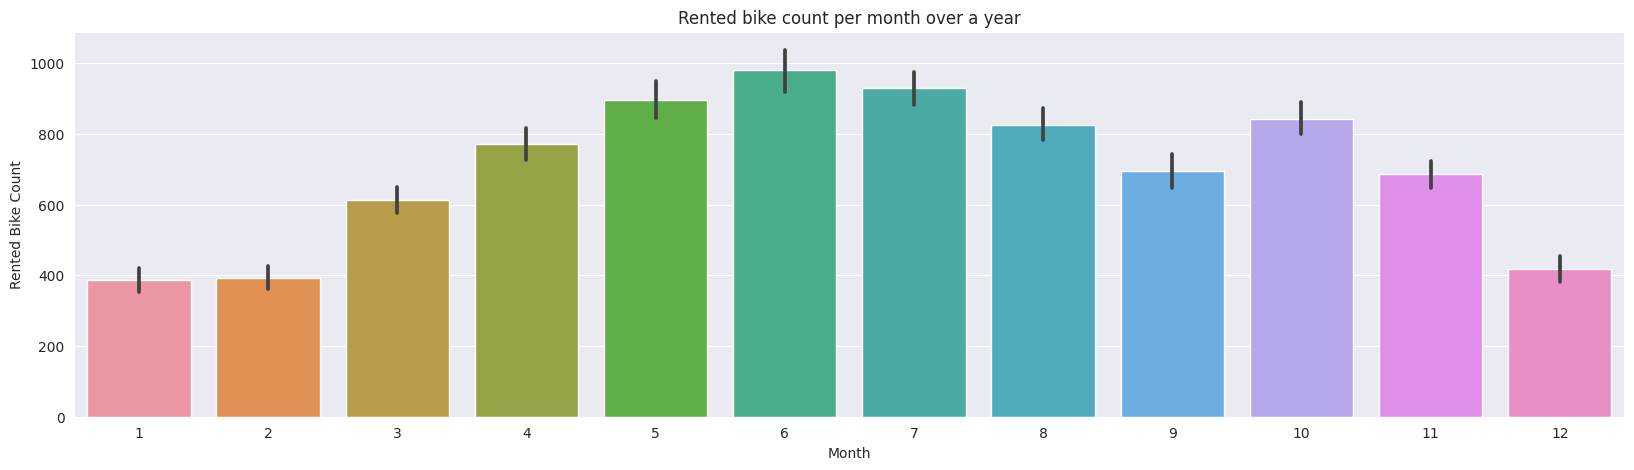

In [18]:
# Analysing in which months bike's were most rented.

plt.figure(figsize=(20,5))
sns.barplot(x='month',y='rbc',data=df)
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.title('Rented bike count per month over a year')

* ***As, we can see by the above plot that most bikes were rented in months from March to September basically in the season of Summer.***

####**Weekend**

Text(0.5, 1.0, 'Rented bike count on weekend and normal days')

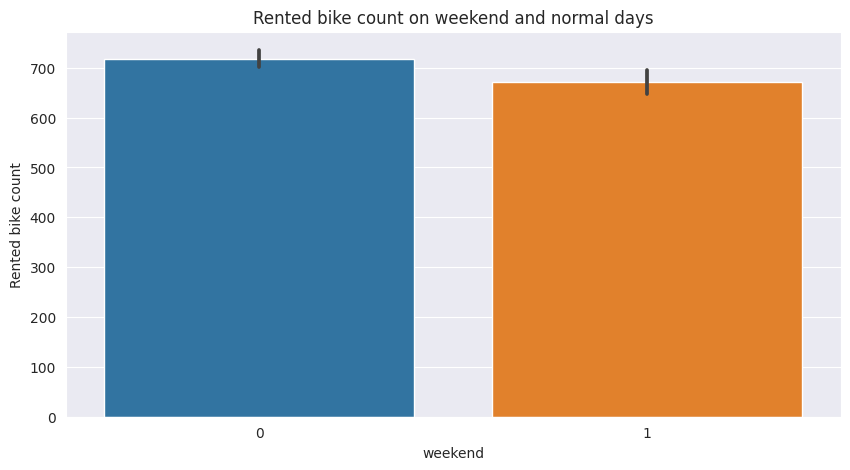

In [19]:
# Analysing with the help of a barplot that When bikes were most rented whether on weekdays or on weekend.

plt.figure(figsize=(10,5))
sns.barplot(x='weekend',y = 'rbc',data=df)
plt.ylabel('Rented bike count')
plt.title('Rented bike count on weekend and normal days')

* ***By the above plot, we can conclude that bikes were most rented on weekdays as compared to weekends even though there is not much difference in the count of both but still on weekday's bikes rental count was slightly higher as compared to rental on weekend.***

Text(0.5, 1.0, "Hour's during which bike's were most rented on weekday's and weekend's")

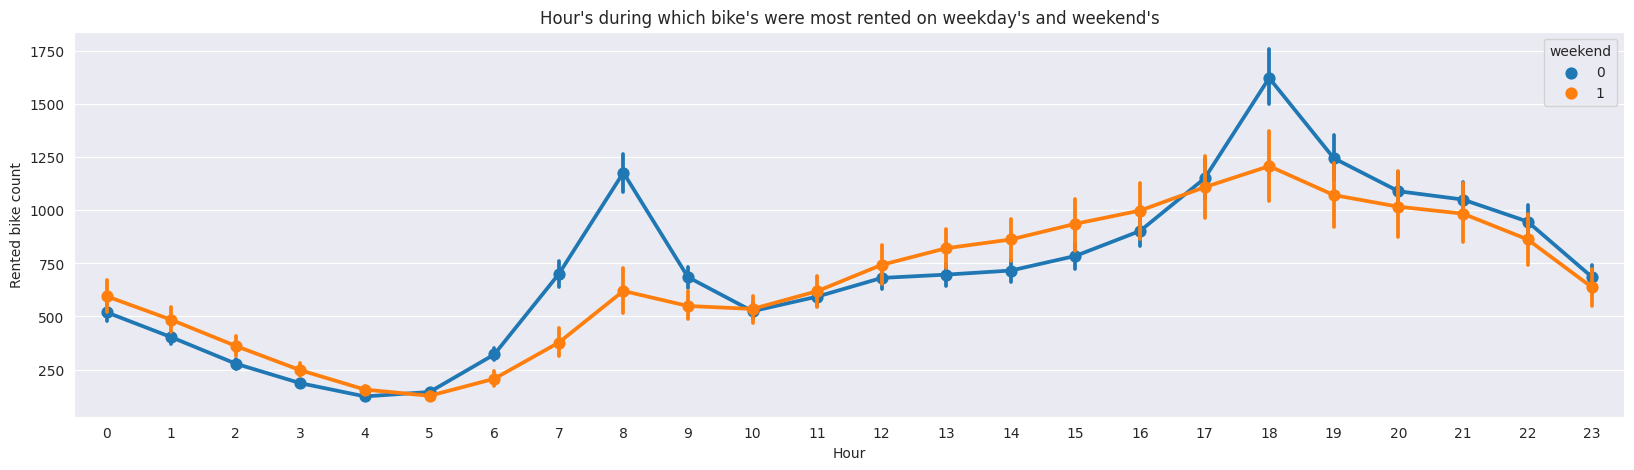

In [20]:
# Analysing with the help of a pointplot about those hour's in a day when the rental demand was high on weekend's and on weekday's.

plt.figure(figsize=(20,5))
sns.pointplot(x='hour',y='rbc',data=df,hue='weekend')
plt.xlabel('Hour')
plt.ylabel('Rented bike count')
plt.title("Hour's during which bike's were most rented on weekday's and weekend's")

* ***Orange line denotes weekend's whereas blue line denotes weekday's.***

* ***As, we can see with the help of the above plot that bike rentals were on peak during the early morning hours from 6 to 10 am which is basically the time of students and office goers and from 4 to 6 pm i.e when college students and office goers returns back to home.***

####**Hour**

Text(0.5, 1.0, "Number of bike's rented during differnt hour's of the day")

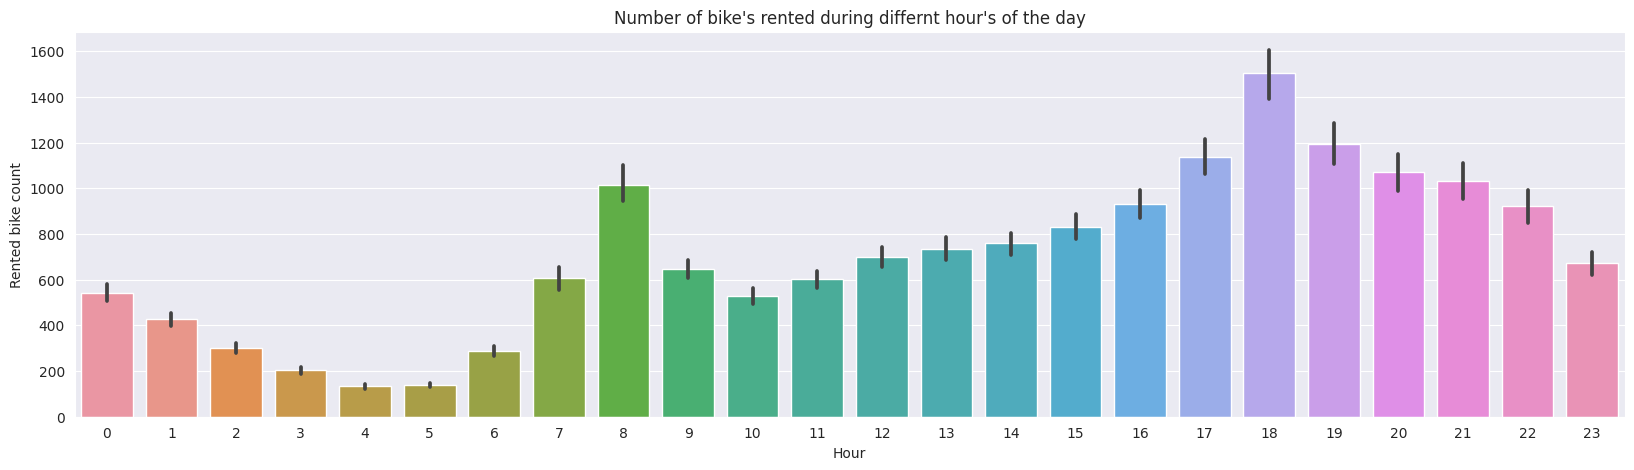

In [21]:
# Analysing the previous observation again with another type of plot to identify any underlying information.

plt.figure(figsize=(20,5))
sns.barplot(x='hour',y='rbc',data=df)
plt.xlabel('Hour')
plt.ylabel('Rented bike count')
plt.title("Number of bike's rented during differnt hour's of the day")

* ***We can conclude by the above graph that people use rental bikes more in morning's from 6 to 8 am and in evening's from 5 to 7 pm.***

####**Functioning day**

Text(0.5, 1.0, "Rented bike's count on functioning day's")

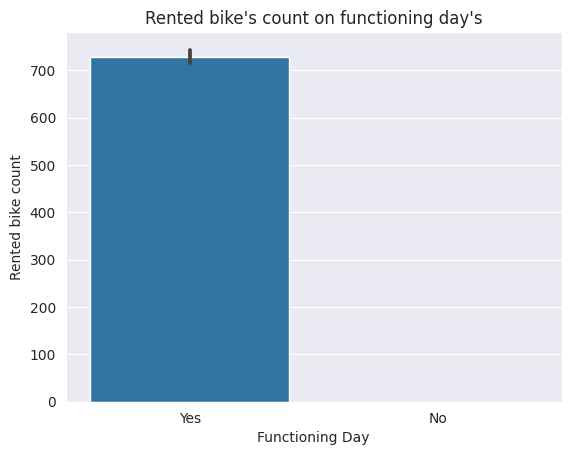

In [22]:
# Analysing bike rental demand on functioning day.

sns.barplot(x='Functioning Day',y='rbc',data=df)
plt.ylabel('Rented bike count')
plt.title("Rented bike's count on functioning day's")

* ***As, we can see by the above plot very clearly that bike rental service is used only on functioning days while there is close to 0 bike was rented on a non-functioning day.***

In [23]:
# Checking how many holidays and non-holidays are there in dataframe.

df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

####**Holiday**

Text(0.5, 1.0, "Number of bike's rented on holiday's and non-holiday's")

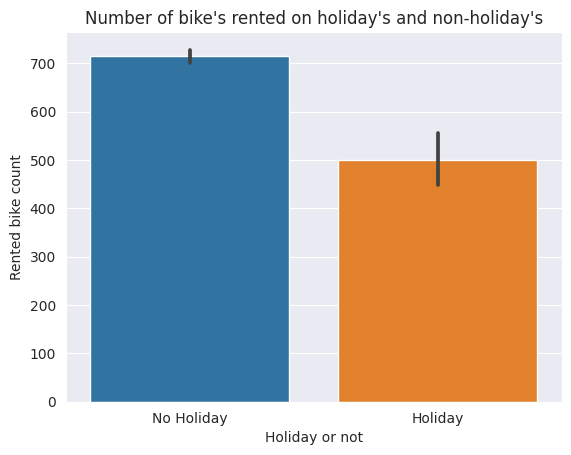

In [24]:
# Analysing bike rental demand on holidays and non - holidays. 

sns.barplot(x='Holiday',y='rbc',data=df)
plt.xlabel('Holiday or not')
plt.ylabel('Rented bike count')
plt.title("Number of bike's rented on holiday's and non-holiday's")

* ***By the above observation, we can conclude that more bikes were rented on non - holidays as compared to rentals on holidays.***

In [25]:
# Checking how many holidays and non-holidays are there in dataframe.

df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Text(0.5, 1.0, "Change in bike rental's on holiday's and non-holiday's")

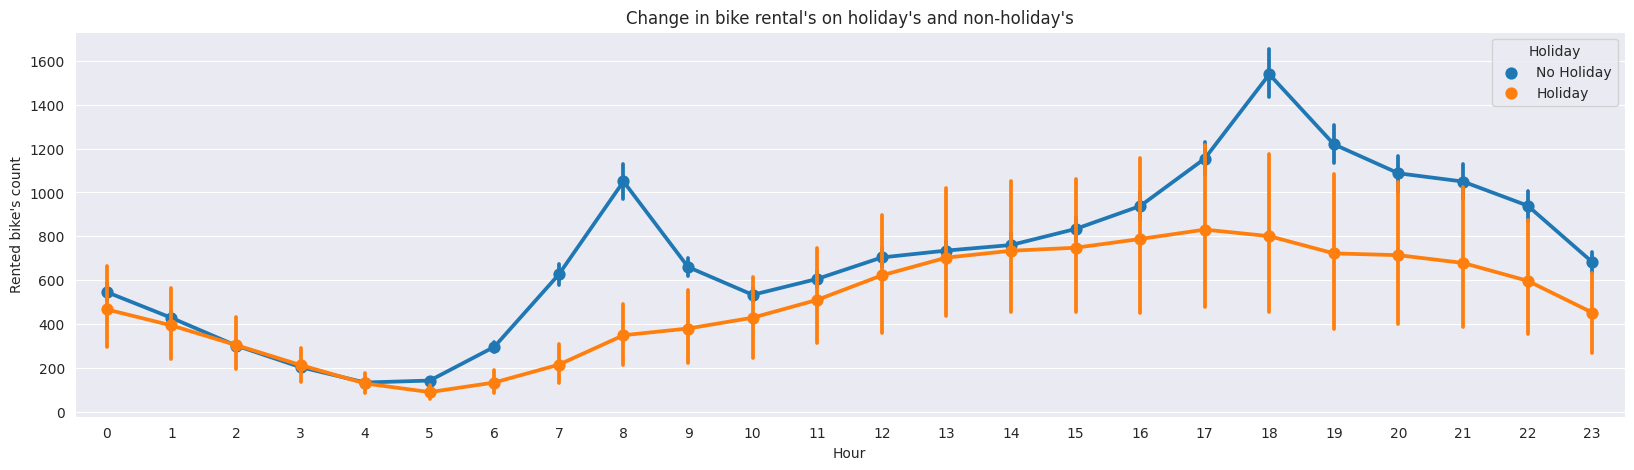

In [26]:
# A pointplot showing on which hours on holidays and on non-holidays most bikes were rented. 

plt.figure(figsize=(20,5))
sns.pointplot(x='hour',y='rbc',data=df,hue='Holiday')
plt.xlabel('Hour')
plt.ylabel("Rented bike's count")
plt.title("Change in bike rental's on holiday's and non-holiday's")

* ***By the above observation, we can conclude that bikes were mostly rented on non-holidays on same timings shown by previous graphs but it is interesting that on holidays there is no such surge in rentals is seen.***

* ***On holiday's, bike rentals showing a gradual surge in demand as we can see from 7 am to to 5 pm afterwards it decreases slightly.***

####**Seasons**

#####**By observing the above chart, we can conclude following observations :-**

* ***SUMMER - Highest number of bikes rented out of all seasons.***

* ***AUTUMN - After, summer highest number of bikes were rented in autumn.***

* ***SPRING - In spring, slightly less number of bikes were rented as compared to autumn.*** 

* ***WINTER - Least number of bikes rented in winter out of all seasons.*** 

Text(0.5, 1.0, 'Number of bikes rented in different seasons of the year')

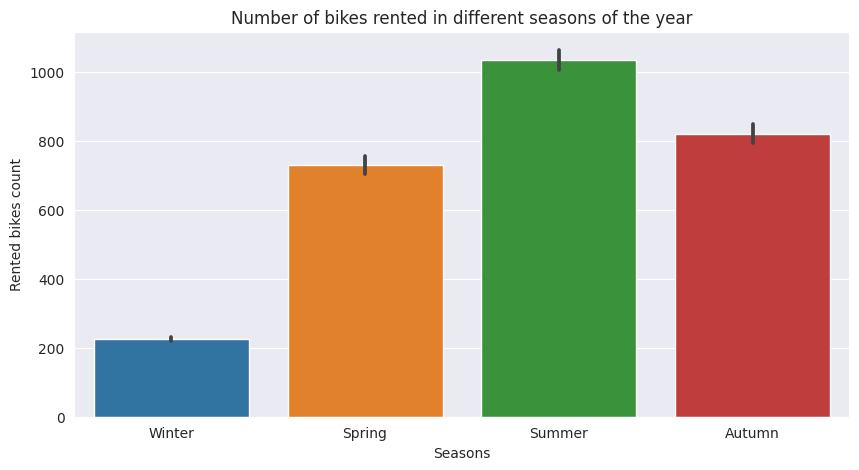

In [27]:
# Analysing number of bike rentals in different seasons.

plt.figure(figsize=(10,5))
sns.barplot(x='Seasons',y='rbc',data = df)
plt.ylabel('Rented bikes count')
plt.title('Number of bikes rented in different seasons of the year')

In [28]:
# Checking how many days are there in different seasons in dataframe.

df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

#####***By observing the above chart, we can conclude that :-***

* ***Peak times are almost same in nature for all seasons except throughout the year except winter i.e. 7 to 9 am and 4 to 6 pm.***

* ***In winter, Overall bikes rentals were less and and there was a slight surge observed in 7 to 8 am in mornings and 5 to 6 pm in evenings.***

Text(0.5, 1.0, 'Trend of bikes rental throughout the day over all seasons.')

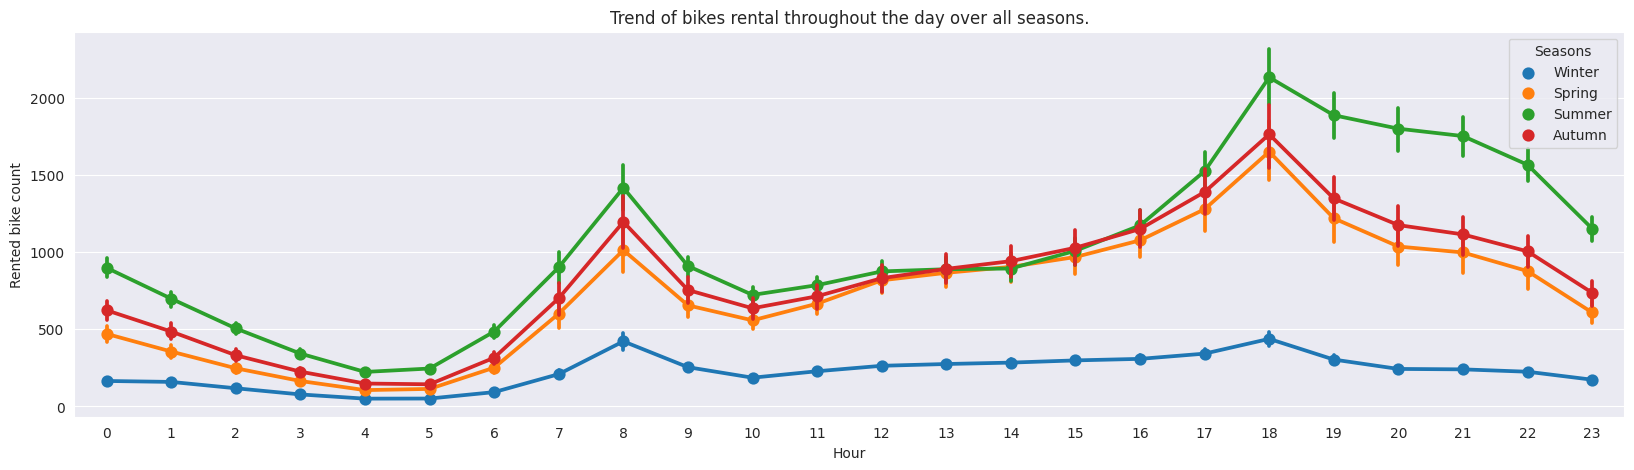

In [29]:
# Analysing the trend of bikes rental throughout the day over all seasons. 

plt.figure(figsize=(20,5))
sns.pointplot(x='hour',y='rbc',data = df,hue = 'Seasons')
plt.xlabel('Hour')
plt.ylabel('Rented bike count')
plt.title('Trend of bikes rental throughout the day over all seasons.')

###**Analysis of Dependent variable vs. Numerical data type**

####**Temperature**

Text(0.5, 1.0, 'Relation between temperature and rental bikes')

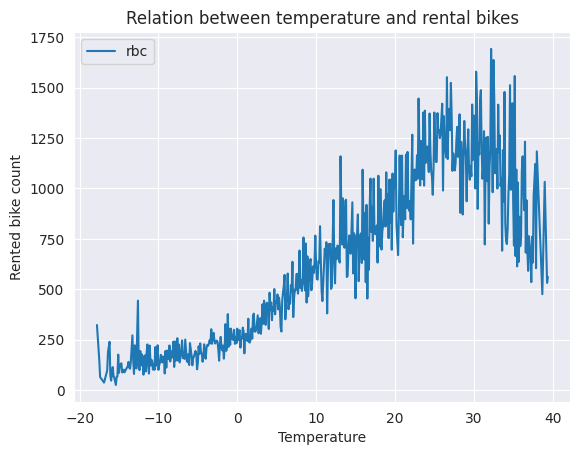

In [30]:
# Analysing the relation between temperature and rental bikes.

df.groupby('temp').agg({'rbc':'mean'}).plot()
plt.xlabel('Temperature')
plt.ylabel('Rented bike count')
plt.title('Relation between temperature and rental bikes')

* ***As, we can see by the above plot that bike rentals and high temperature are correlated i.e. users are renting more bikes in high temperature's.***

####**Humidity (%)**

Text(0, 0.5, 'Rented bike count')

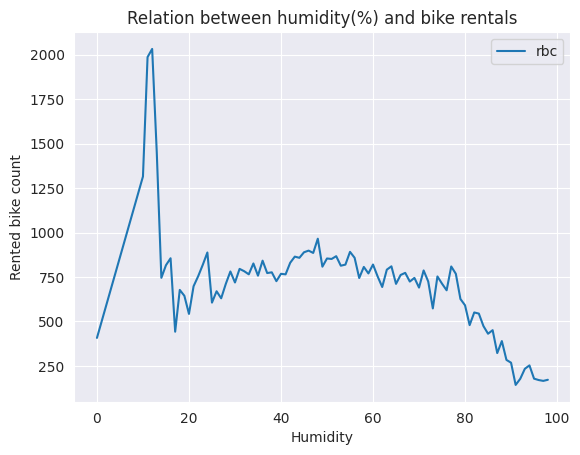

In [31]:
# Analysing relation between humidity and rental bikes count.

df.groupby('hum').agg({'rbc':'mean'}).plot()
plt.title('Relation between humidity(%) and bike rentals')
plt.xlabel('Humidity')
plt.ylabel('Rented bike count')

* ***It's obvious by the above plot that people tend to rent more bikes in less humid weather i.e. 5 - 10%.***

####**Wind speed (m/s)**

Text(0, 0.5, 'Rented bike count')

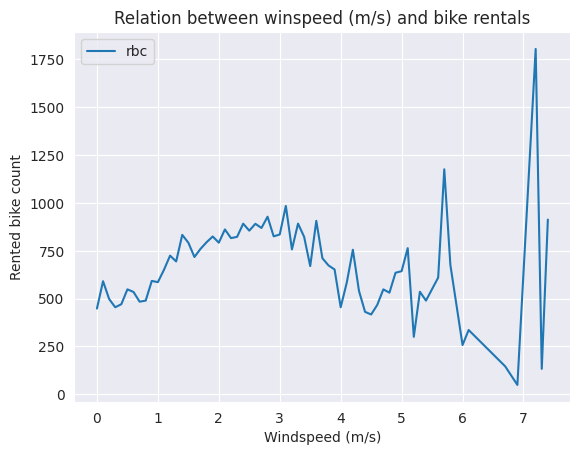

In [32]:
# Analysing the relation between wind speed and rental bikes.

df.groupby('wind').agg({'rbc':'mean'}).plot()
plt.title('Relation between winspeed (m/s) and bike rentals')
plt.xlabel('Windspeed (m/s)')
plt.ylabel('Rented bike count')

* ***By the above plot, we can conclude that people loves to ride bike's when it's windy outside.***

####**Dew point temperature (In celsius)**

Text(0, 0.5, 'Rented bike count')

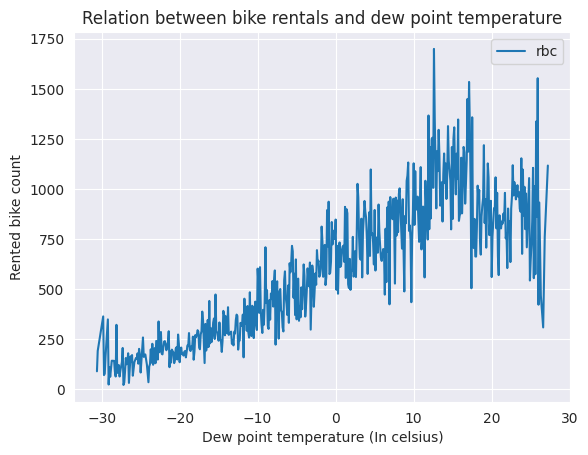

In [33]:
# Analysing the relation between dew point temperature and rental bikes.

df.groupby('dpt').agg({'rbc':'mean'}).plot()
plt.title('Relation between bike rentals and dew point temperature')
plt.xlabel('Dew point temperature (In celsius)')
plt.ylabel('Rented bike count')

* ***As, we can see by the above graph that bike rentals and dew point temperature are positively correlated i.e. people tends to rent more bikes in high dew point temperature.***

####**Rainfall (mm)**

Text(0.5, 1.0, 'Relation between rainfall and bike rentals')

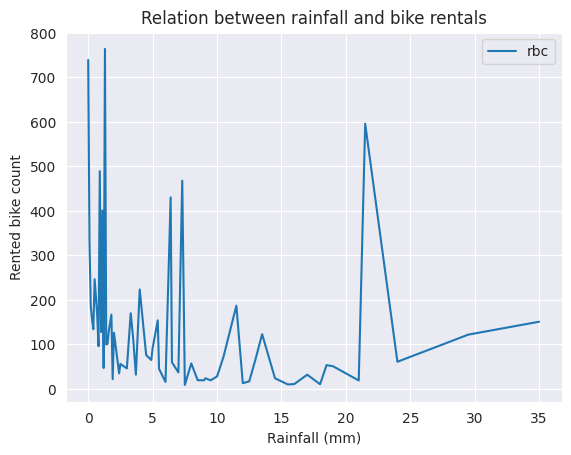

In [34]:
# Analysing the relation between rainfall and rental bikes.

df.groupby('rain').agg({'rbc':'mean'}).plot()
plt.xlabel('Rainfall (mm)')
plt.ylabel('Rented bike count')
plt.title('Relation between rainfall and bike rentals')

* ***As, we can see by the above data that people are renting bikes irrespective of the rainfall i.e. either high or low even if there is high rainfall i.e. 20 - 25 mm people are still renting high number of bikes.***

####**Snowfall (cm)**

Text(0, 0.5, 'Rented bike count')

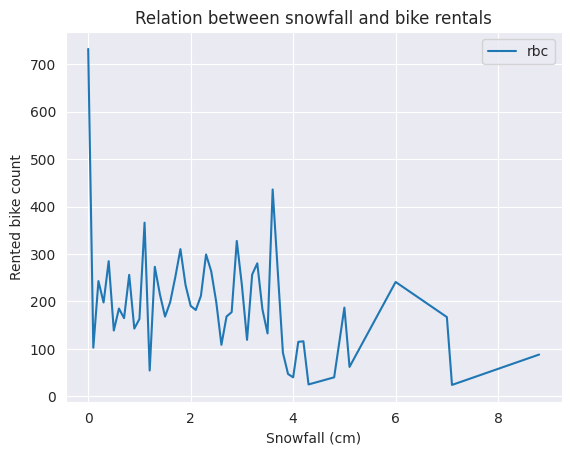

In [35]:
# Analysing the relation between snowfall and rental bikes.

df.groupby('snow').agg({'rbc':'mean'}).plot()
plt.title('Relation between snowfall and bike rentals')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented bike count')

* ***As we can conclude by the above graph that people are more likely to rent a bike when there is no snowfall as there is a high peak in demand where there was no snowfall and afterwards the demand could be seen decreasing with an increase in snowfall.***

### **Regression plot of Dependent variable vs. Numerical data type**

**What is a regression plot ?**

***we can define regression plot as a plot which depicts how one variable is linearly related to another variable with the help of a best fitted line through scattered data points in a plot during exploratory data analysis.***

####**Temperature**

Text(0, 0.5, 'Rented bike count')

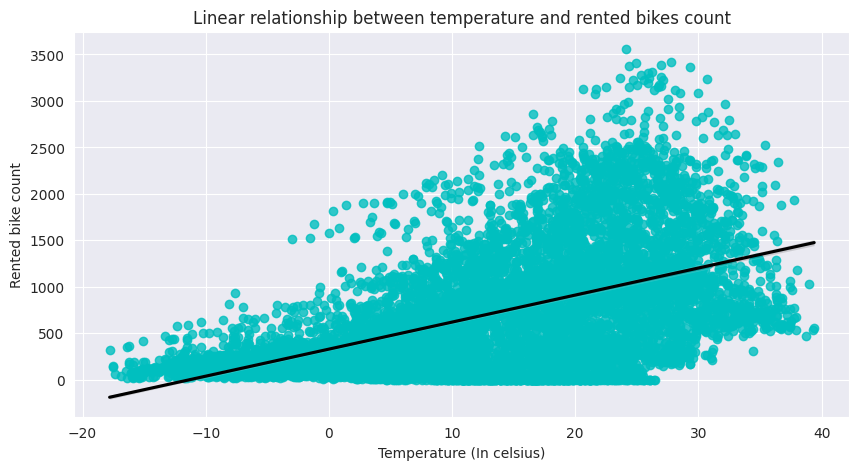

In [36]:
# Analyzing how the temperature is linearly related to rented bike count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['temp'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between temperature and rented bikes count')
plt.xlabel('Temperature (In celsius)')
plt.ylabel('Rented bike count')

* ***As we can clearly conclude by the above plot, temperature and bike rentals are positively correlated to each other.the higher the temperature, the higher the bike rentals.***

* ***The higher the temperature, the higher the bike rentals.***

####**Humidity (%)**

Text(0, 0.5, 'Rented bikes count')

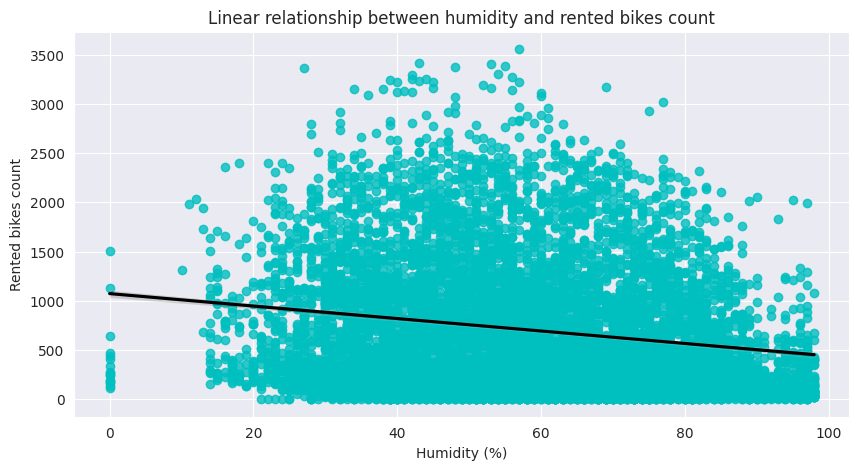

In [37]:
# Analyzing linear relationship between humidity and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['hum'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between humidity and rented bikes count')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented bikes count')

* ***As we can conclude by the above plot, humidity and bike rentals are negatively related to each other.***

* ***The lower the humidity, the more bike rentals.***

####**Wind speed (m/s)**

Text(0, 0.5, 'Rented bikes count')

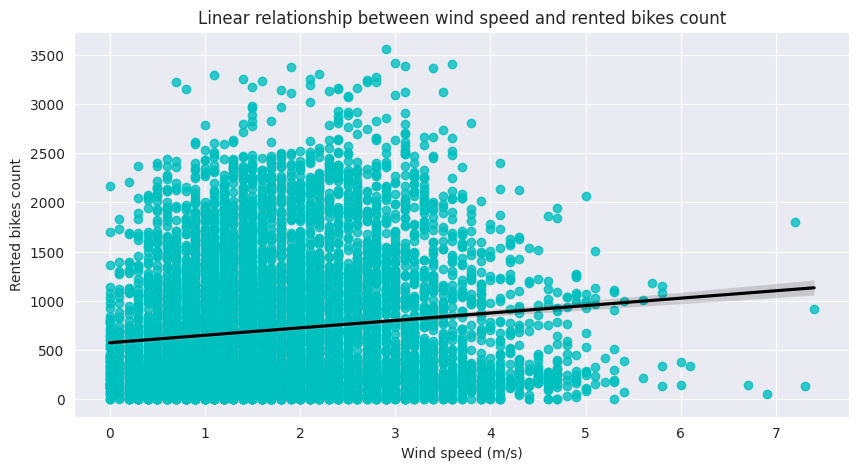

In [38]:
# Analyzing linear relationship between Wind speed and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['wind'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between wind speed and rented bikes count')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented bikes count')

* ***A positive relationship is seen between wind speed and rented bike counts.***

* ***The higher the wind speed, the higher the bike rentals.***

####**Visibility (10m)**

Text(0, 0.5, 'Rented bikes count')

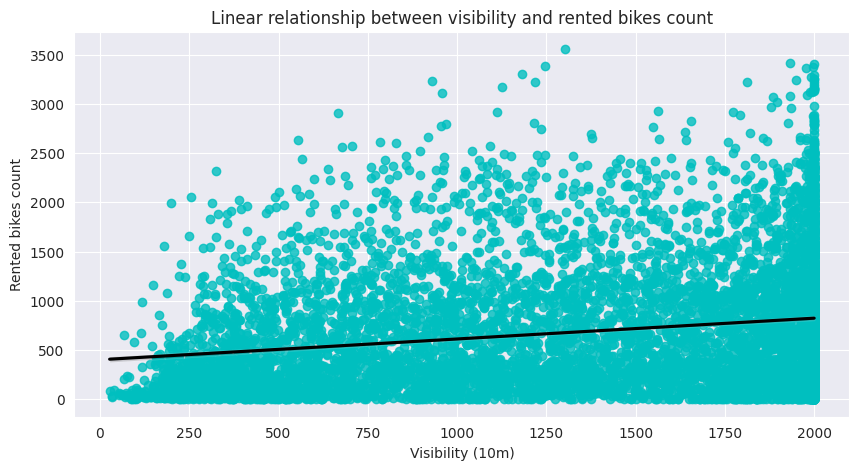

In [39]:
# Analyzing linear relationship between Visibility and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['visib'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between visibility and rented bikes count')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented bikes count')

* ***A positive relationship is seen between visibility and rented bike counts.***

* ***The higher the visibility, the higher the bike rentals.***

####**Dew point temperature (In celsius)**

Text(0, 0.5, 'Rented bike count')

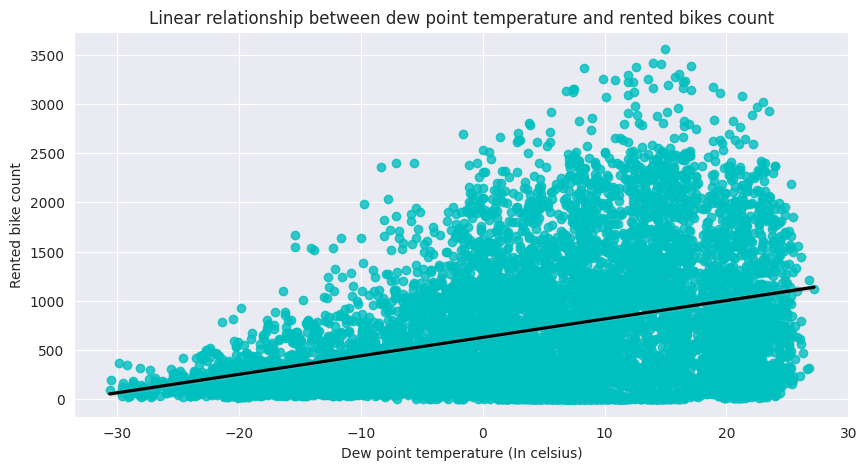

In [40]:
# Analyzing linear relationship between dew point temperature and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['dpt'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between dew point temperature and rented bikes count')
plt.xlabel('Dew point temperature (In celsius)')
plt.ylabel('Rented bike count')

* ***A positive relationship is seen between dew point temperature and rented bike counts.***

* ***The higher the dew point temperature, the higher the bike rentals.***

####**Solar Radiation**

Text(0, 0.5, 'Rented bike count')

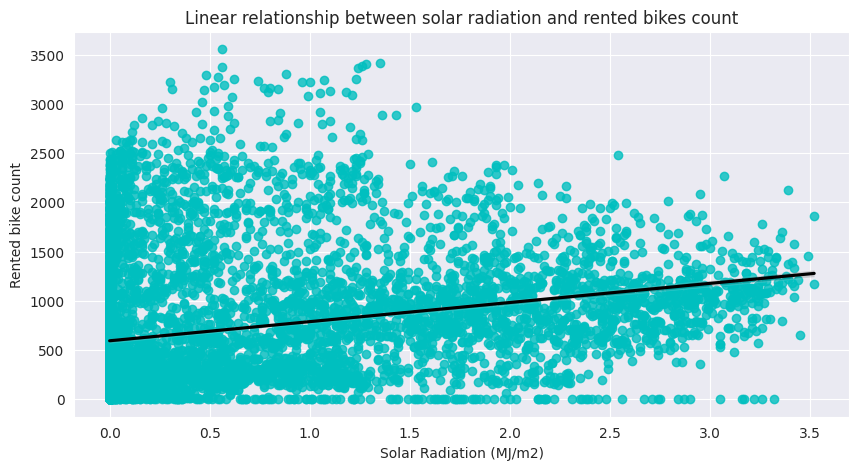

In [41]:
# Analyzing linear relationship between solar radiation and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['rad'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between solar radiation and rented bikes count')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented bike count')

* ***We can see a positive relationship between solar radiation and rented bike counts.***

* ***The more solar radiation, the higher the bike rental count.***

####**Rainfall (mm)**

Text(0, 0.5, 'Rented bike count')

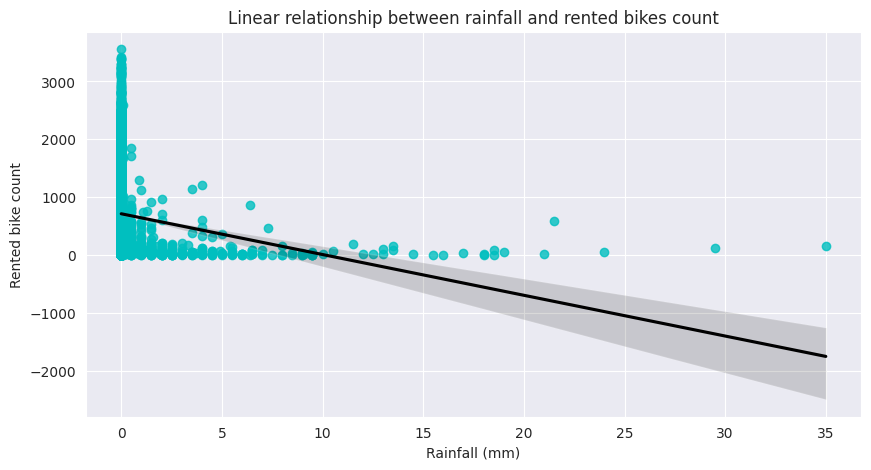

In [42]:
# Analyzing linear relationship between rainfall and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['rain'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between rainfall and rented bikes count')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Rented bike count')

* ***We can see a negative relationship between rainfall and the dependent variable.***

* ***When there is high rainfall, there are fewer bike rentals.***

####**Snowfall (cm)**

Text(0, 0.5, 'Rented bike count')

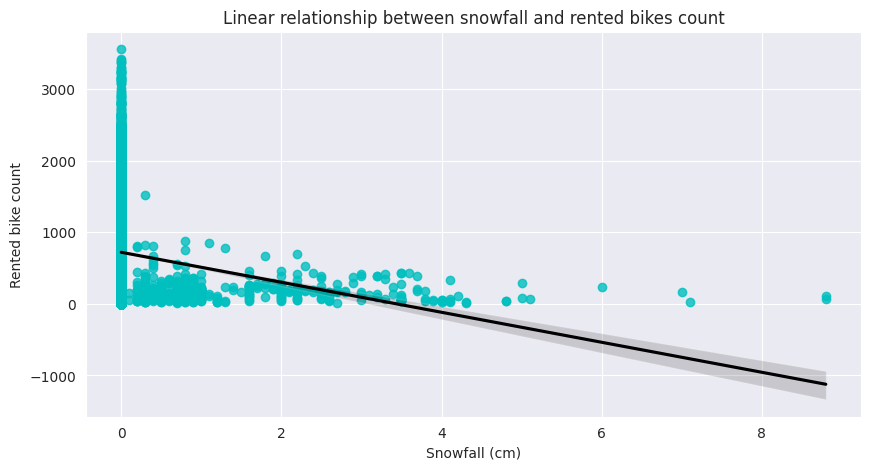

In [43]:
# Analyzing linear relationship between snowfall and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['snow'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between snowfall and rented bikes count')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented bike count')

* ***Snowfall showed a negative relationship with the dependent variable.***

* ***The higher the snowfall, the lower the bike rentals.***

##**Univariate Analysis**

### **Checking distributions of independent variables**

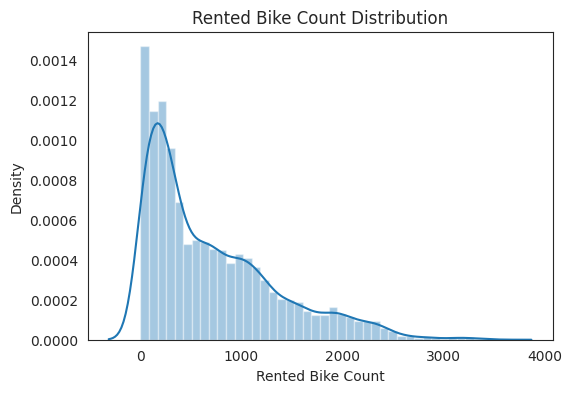

In [44]:
# Distribution for 'Rented Bike Count'.

sns.set_style(style='white')
plt.figure(figsize=(6,4))
sns.distplot(df['rbc'])
plt.xlabel('Rented Bike Count',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Rented Bike Count Distribution')
plt.show()

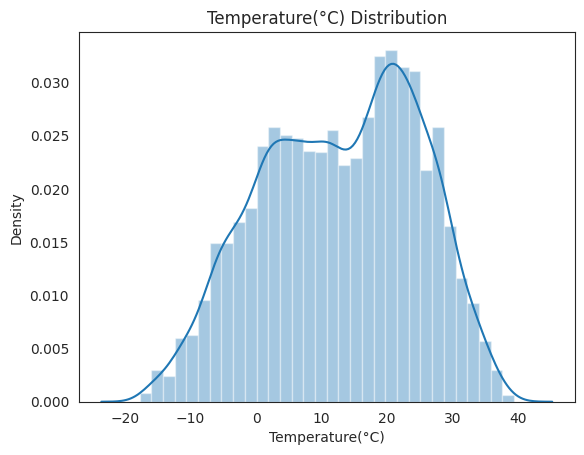

In [45]:
# Distribution for Temperature(°C) column.

sns.distplot(df['temp'])
plt.xlabel('Temperature(°C)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Temperature(°C) Distribution')
plt.show()

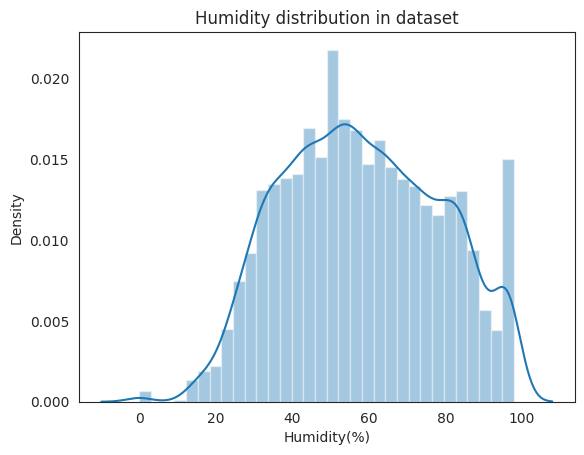

In [46]:
# Distribution for Humidity(%) column.

sns.distplot(df['hum'])
plt.xlabel('Humidity(%)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Humidity distribution in dataset')
plt.show()

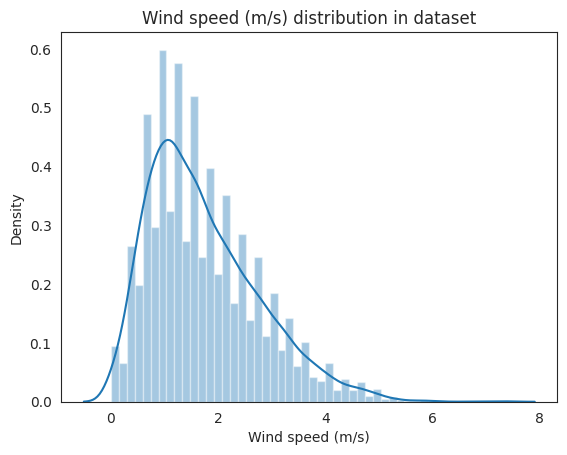

In [47]:
# Distribution for Wind speed (m/s) column.

sns.distplot(df['wind'])
plt.xlabel('Wind speed (m/s)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Wind speed (m/s) distribution in dataset')
plt.show()

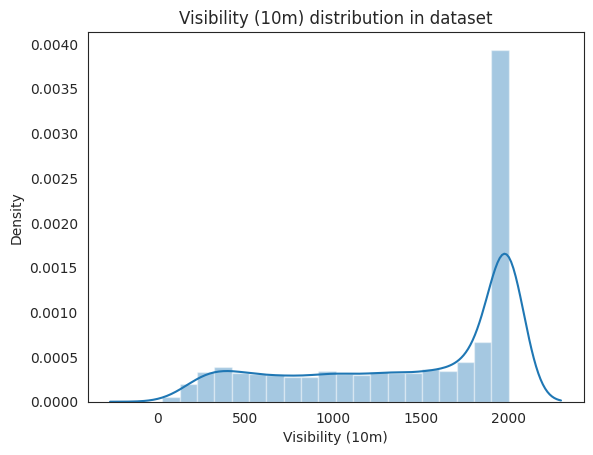

In [48]:
# Distribution for Visibility (10m) column.

sns.distplot(df['visib'])
plt.xlabel('Visibility (10m)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Visibility (10m) distribution in dataset')
plt.show()

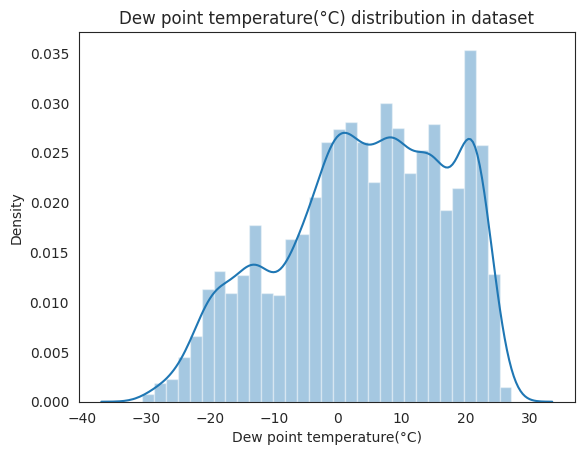

In [49]:
# Distribution for Dew point temperature(°C) column.

sns.distplot(df['dpt'])
plt.xlabel('Dew point temperature(°C)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Dew point temperature(°C) distribution in dataset')
plt.show()

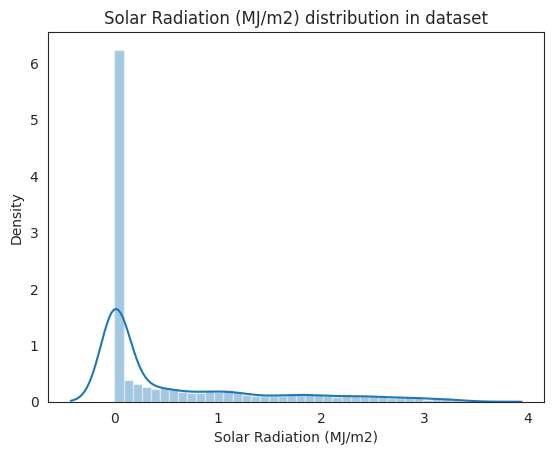

In [50]:
# Distribution for Solar Radiation (MJ/m2) column.

sns.distplot(df['rad'])
plt.xlabel('Solar Radiation (MJ/m2)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Solar Radiation (MJ/m2) distribution in dataset')
plt.show()

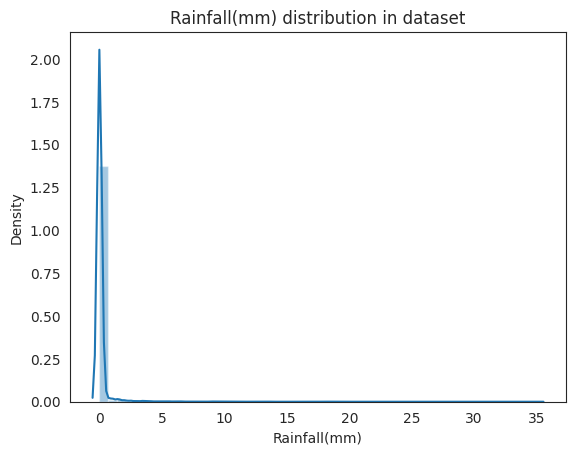

In [51]:
# Distribution for Rainfall(mm) column.

sns.distplot(df['rain'])
plt.xlabel('Rainfall(mm)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Rainfall(mm) distribution in dataset')
plt.show()

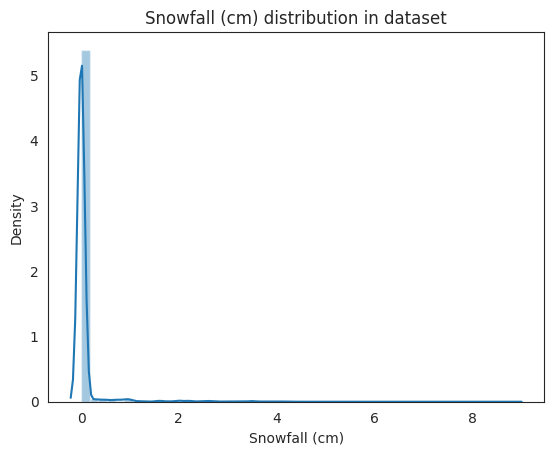

In [52]:
# Distribution for Snowfall (cm) column.

sns.distplot(df['snow'])
plt.xlabel('Snowfall (cm)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Snowfall (cm) distribution in dataset')
plt.show()

* ***In all the above plots, we were checking distributions of various numerical variable's as if the distribution's are normal in nature then it could be very helpful in further analysis.***

##**Correlation Heatmap**

**What is a correlation heatmap?**

* ***We can define a heatmap as a visual representation of the correlation between all the variables present in the data frame.***

* ***To represent this, it uses a system of colour palettes ranging from light to dark, demonstrating low to high positive or negative correlation.***

<Axes: >

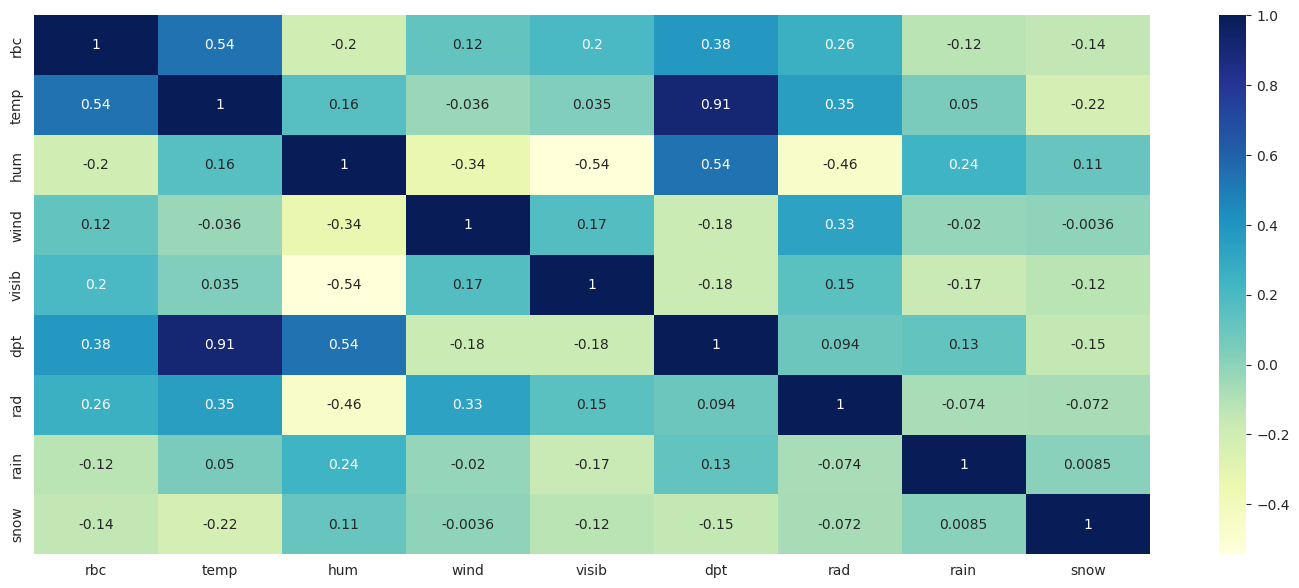

In [53]:
# Correlation heatmap of our dataset.

plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

 **As we can conclude by the above plot :-**

 * ***Temperature, dew point temperature, solar radiation, and visibility are showing positive correlations, whereas snowfall, rainfall, and humidity are showing negative correlations with the target variable.***

#**Feature Engineering and Data-preprocessing**

##**Checking Missing and Duplicate values**

In [54]:
# Checking null values.

df.isnull().sum()

rbc                0
hour               0
temp               0
hum                0
wind               0
visib              0
dpt                0
rad                0
rain               0
snow               0
Seasons            0
Holiday            0
Functioning Day    0
month              0
weekend            0
dtype: int64

In [55]:
# Checking duplicate values.

values = len(df[df.duplicated()])
print(f'Number of duplicated values : {values}')

Number of duplicated values : 0


* ***As we can see there are no missing and duplicate values in this dataframe.***

##**Data Transformation and Handling Outliers**

Text(0.5, 1.0, 'Distribution of rented bike count')

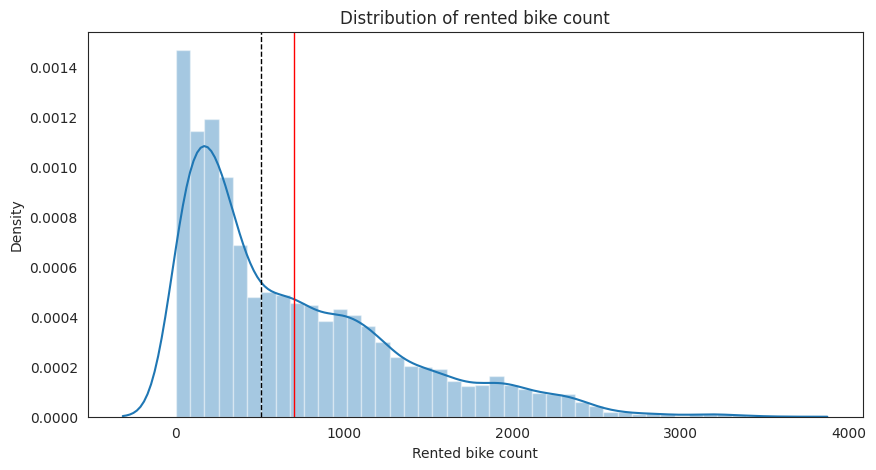

In [56]:
# Checking distribution of our target variable.

fig,ax=plt.subplots(figsize=(10,5))
sns.distplot(df['rbc'])
ax.axvline(df['rbc'].mean(),linewidth=1,color='red',linestyle='solid')
ax.axvline(df['rbc'].median(),linewidth=1,color='black',linestyle='dashed')
plt.xlabel('Rented bike count')
plt.title('Distribution of rented bike count')

* ***As we can conclude from the above plot, our target variable is moderately right-skewed.***

* ***In the above plot, the red solid line depicts the mean of the variable, whereas the dashed black line represents the median of the plot..***

* ***Linear models such as liner regression, logistic regression,etc. assume that the distribution of features is normal in nature, and they perform well (accurate) when the distribution of the target variable is normal in nature; therefore, we have to perform some operations to make it normal.***

Text(0, 0.5, 'Rented bike count')

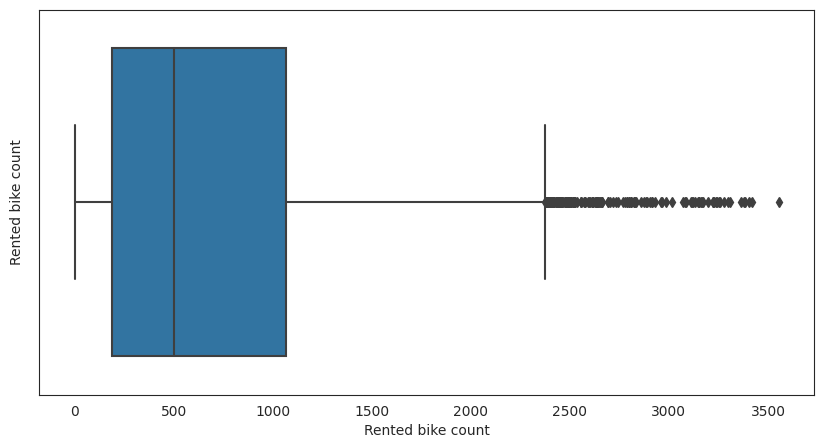

In [57]:
# Creating a boxplot of rented bike count column to check outliers.

plt.figure(figsize=(10,5))
sns.boxplot(x=df['rbc'])
plt.xlabel('Rented bike count')
plt.ylabel('Rented bike count')

* ***We can see from the boxplot above that there are many outliers in the target variable.***

* ***Performing a square root transformation to treat the moderate right skewness of the dependent variable***

Text(0.5, 1.0, 'Near normal distribution of target variable after square-root transformation')

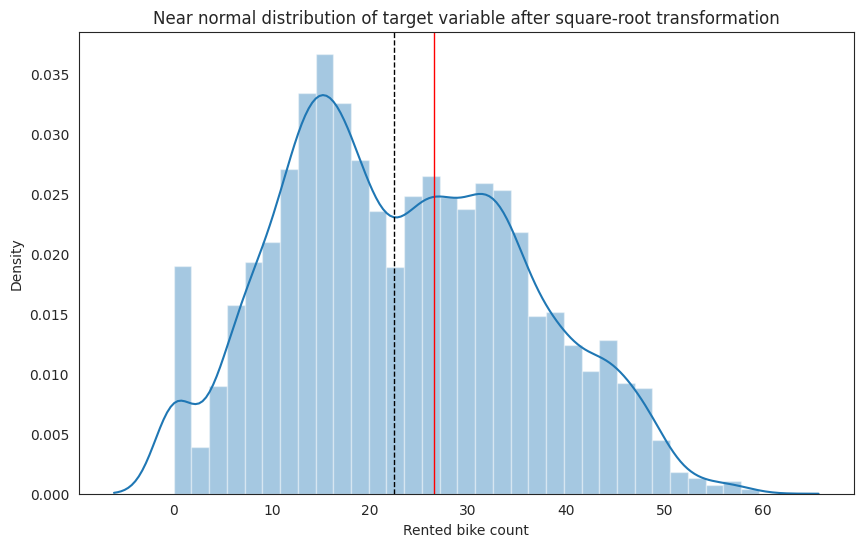

In [58]:
# Applying square root transfromation to treat the right skewness of the distribution.

fig,ax = plt.subplots(figsize=(10,6))
sns.distplot(np.sqrt(df['rbc']))
ax.axvline(np.sqrt(df['rbc'].mean()),linewidth=1,color='red',linestyle='solid')
ax.axvline(np.sqrt(df['rbc'].median()),color='black',linestyle='dashed',linewidth=1)
plt.xlabel('Rented bike count')
plt.title('Near normal distribution of target variable after square-root transformation')

* ***After applying the square root transformation, we can see the distribution of the target variable is now near normal.***

* ***The red line depicts the mean, while the dashed black line depicts the median.***

Text(0, 0.5, 'Rented bike count')

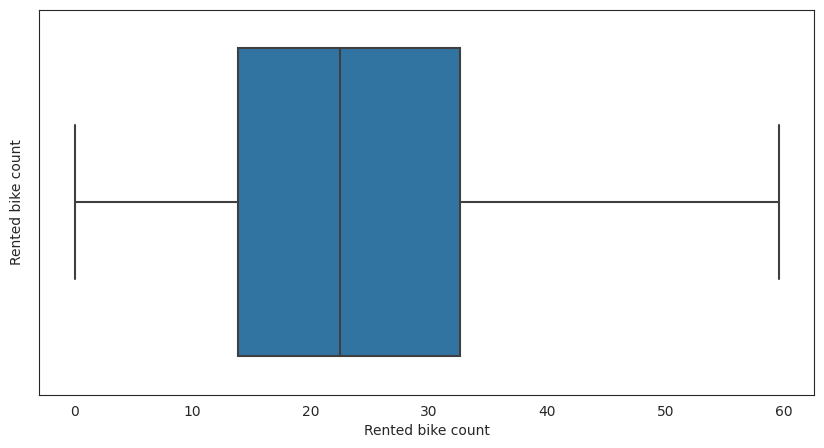

In [59]:
# Checking for outliers after transfromation.

plt.figure(figsize=(10,5))
sns.boxplot(x=np.sqrt(df['rbc']))
plt.xlabel('Rented bike count')
plt.ylabel('Rented bike count')

* ***We can see in the above boxplot there are no outliers present after the transfomation***

##**Feature engineering**

<Axes: >

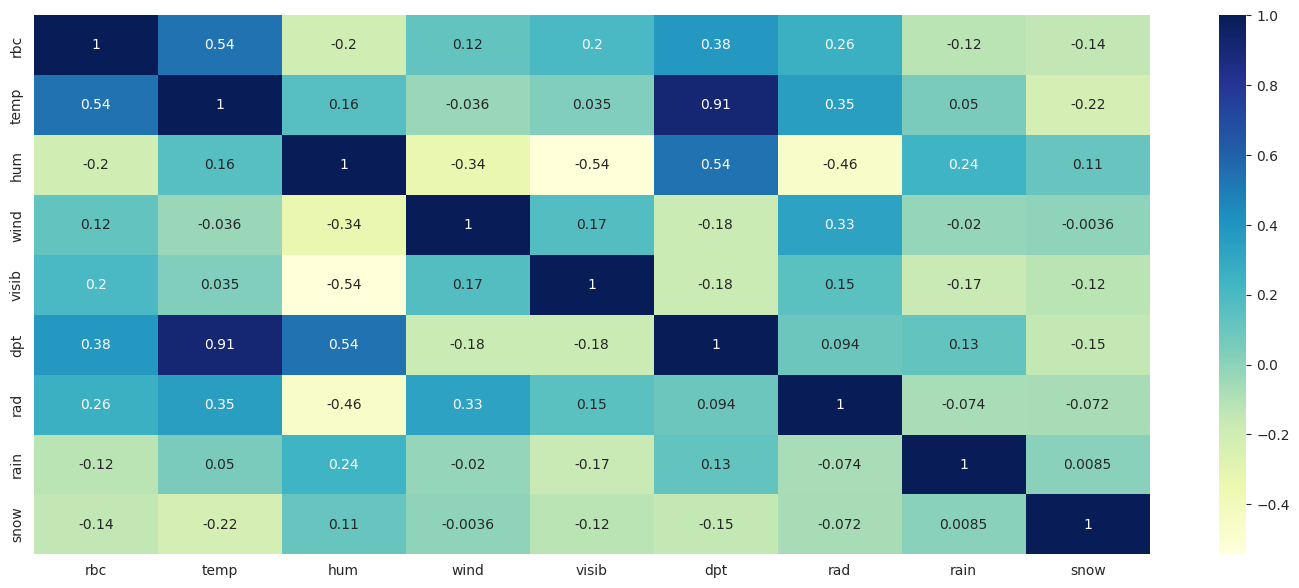

In [60]:
# Correlation heatmap of our dataset.

plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

 * ***Dew point temperature and temperature are showing a high positive correlation.***

In [61]:
# Dropping dew point temperature column.

df.drop('dpt',axis=1,inplace=True)

* ***Dew point temperature and temperature are showing a high positive correlation, so we are dropping the dew point temperature column as it can have an effect on the output as well as in an attempt to remove multicollinearity.***

In [62]:
df.head()

,rbc,hour,temp,hum,wind,visib,rad,rain,snow,Seasons,Holiday,Functioning Day,month,weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


* ***We can see above in the dataframe that a column has been dropped.***

###**One hot encoding**

**What is one hot encoding?**

* ***It is a technique that is used in machine learning models to represent categorical variables in the form of numerical values.***

In [63]:
# To display all columns in the output.

pd.set_option('display.max_columns', None)   

In [64]:
# Performig one hot encoding on the datset.

df = pd.get_dummies(df)
df.head()

,rbc,temp,hum,wind,visib,rad,rain,snow,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekend_0,weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [65]:
# Checking new columns after one hot encoding.

df.columns

Index(['rbc', 'temp', 'hum', 'wind', 'visib', 'rad', 'rain', 'snow', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekend_0', 'weekend_1'],
      dtype='object')